F.Falkenberg 7007490
A.Khattak 7025483
P.Choudhary 2581359

## Exercise 2.3 PCA for visualization purposes (3 points)

In this exercise you will perform visualization of [MNIST](http://yann.lecun.com/exdb/mnist/) dataset using PCA. The end result of this exercise should look like [Embedding Projector](https://projector.tensorflow.org/) (please select "Mnist with images" in the dropdown menu on the left of the page).  
Write your code in the respective cells. Of course, you can add additional cells or change their order, but please don't significantly change the structure of the notebook. You must use PyTorch tensors to perform all the calculations.  
For each question that requires written answer, please write it in a markdown cell.

In [10]:
import torch
from torchvision.datasets import MNIST
from torchvision import transforms
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### Loading the data

In [11]:
# Download the dataset and save it to a local folder. You should use the train set.
mnist_dataset = torchvision.datasets.MNIST('data/', train=True, download=True)

X, Y = mnist_dataset.data, mnist_dataset.targets
print(X.shape)

X_flat = X.reshape(-1, 28 * 28).float()
print(X_flat.shape)

# We must make the data zero-centered before applying PCA
M = torch.mean(X_flat)
X_flat = X_flat - M

torch.Size([60000, 28, 28])
torch.Size([60000, 784])


### 2.2.1. Perform PCA on the input data (1 point)

Calculate covariance matrix of the input data. Hint: You can use torch.matmul for matrix multiplication.

In [12]:
cov_matrix = torch.matmul(X_flat.T, X_flat)
cov_matrix.shape

torch.Size([784, 784])

Perform eigendecomposion of the covariance matrix. Hint: you can use torch.linalg.eig.

In [13]:
eig_values, eig_vectors = torch.linalg.eig(cov_matrix)

print("eigen value: ", eig_values.size())
print("eigen vector: ", eig_vectors.size())

eigen value:  torch.Size([784])
eigen vector:  torch.Size([784, 784])


### 2.2.2 Analyzing the results of PCA (1 point)

Extract the first two principal components of the data, i.e. reduce the dimensionality of the dataset to 2. Plot the result. Different numbers must be represented as different colors on the scatter plot. You can use a randomly sampled portion of the data so that the plot doesn't get cluttered.   
Describe whether it's possible to differentiate the numbers in 2 dimensions. Are there any additional observations?

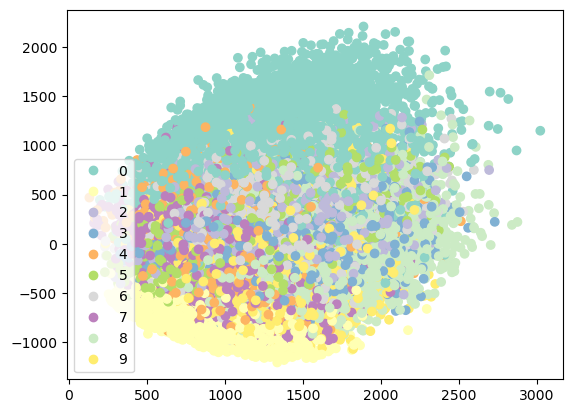

In [14]:
two_vectors = eig_vectors[:, :2].real  # selecting first two eigen vectors

two_dimonsional_data = torch.matmul(two_vectors.T, X_flat.T)

n = two_dimonsional_data.shape[1]
scatter_plot = plt.scatter(two_dimonsional_data[0][:n], two_dimonsional_data[1][:n], c=Y[:n], cmap='Set3')
plt.legend(*scatter_plot.legend_elements(), loc='lower left')

In the 2d plot, the digit 0 is well seperable from the others. The digit 1 and 8 are also on the edge of graph, and therefore are somewhat separable. All the other digits form a cluster of points and are not separable at all in two dimensions.

Plot the graph of cumulative explained variance vs number of components. You might also want to make an additional plot for the first N components. How many components should we use to describe the data? Motivate your answer.

Text(0, 0.5, 'cumulative explained variance %')

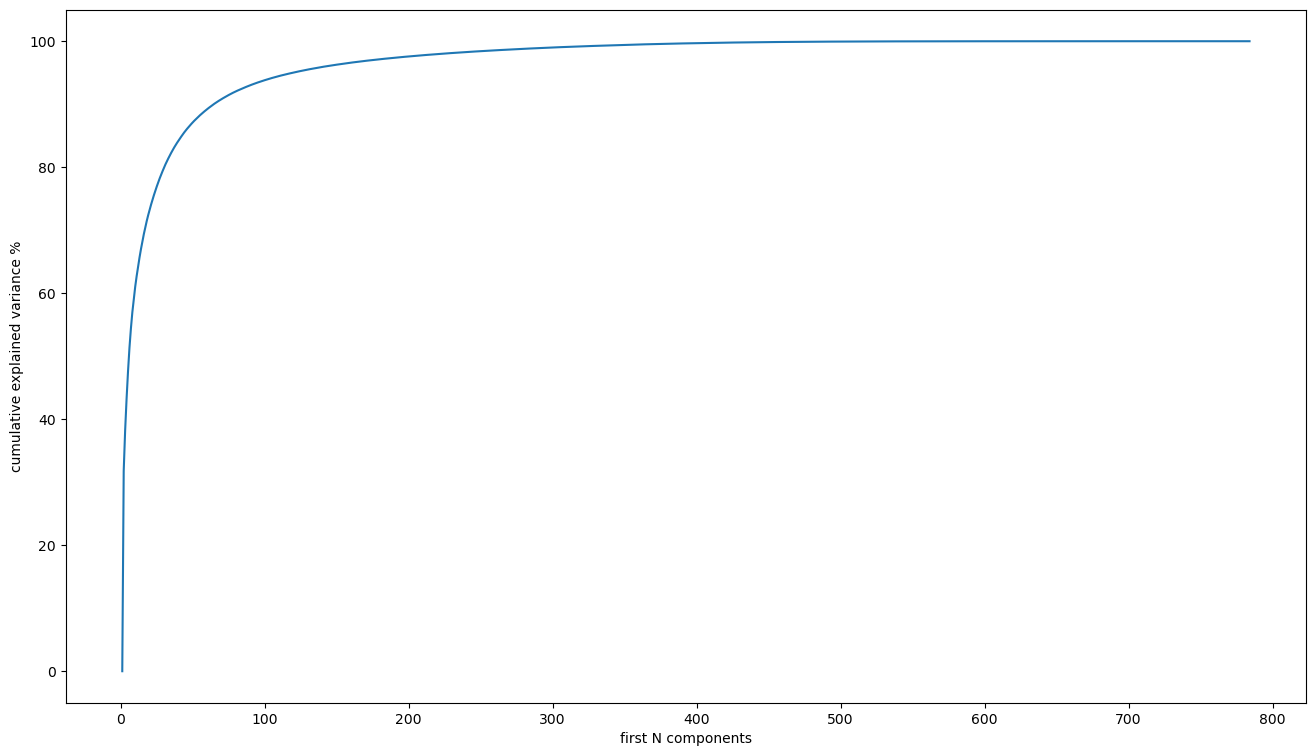

In [15]:
total_eig_values = eig_values.size()[0]
sum_eigvals = torch.sum(eig_values)

cum_var = []
x_pnts = []

plt.figure(figsize=(16, 9))
for i in range(0, total_eig_values):
    cum_var.append((torch.sum(eig_values[0:i]) / sum_eigvals) * 100)
    x_pnts.append(i + 1)

plt.plot(x_pnts, cum_var)
plt.xlabel("first N components")
plt.ylabel("cumulative explained variance %")

### 2.2.3 Visualizing the data in 3 dimensions (1 point)

Reduce the dimensionality of the dataset to 3. Using Tensorboard visualize the resultant data in 3 dimensions. You should get the result similar to the [Embedding Projector](https://projector.tensorflow.org/) project (actually, they use the same Tensorboard package, so the result might be even exactly the same). You can use differently colored points instead of the digit pictures.

In [21]:
from torch.utils.tensorboard import SummaryWriter

import tensorflow as tf
import tensorboard as tb
tf.io.gfile = tb.compat.tensorflow_stub.io.gfile

three_vectors = eig_vectors[:, :3].real  # selecting first two eigen vectors

three_dimonsional_data = torch.matmul(three_vectors.T, X_flat.T).T


# max_sample = 250
# three_dimonsional_data = three_dimonsional_data[:max_sample]
# Y = Y[:max_sample]
print(three_dimonsional_data.shape, Y.shape)

writer = SummaryWriter(log_dir="logs")
writer.add_embedding(three_dimonsional_data, Y)
writer.close()

torch.Size([60000, 3]) torch.Size([60000])


In [20]:
%load_ext tensorboard
%tensorboard --logdir logs --port 6006
# look at http://127.0.0.1:6006/#projector

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Launching TensorBoard...

Analyze the resultant plot.  
Is 3 dimensions considerably better than 2?  
Which digits stand out in 3D and which digits are difficult to differentiate in 3 dimensions?

In 3 dimensions, the digits 0 and 1 can be clearly separated from all other point. The samples for 7, 4, and 9, as well as 2 and 3, overlap greatly, which indicates that they are quite similar.
The rest of the samples form a cluster that one cannot seperate into its classes.

While in three dimensions, one get more insight into the relationship of the data, the gain of insight from switching from 2 dimensions is not as big as one might think.